In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
import fighters_cleanser
import constants

In [4]:
fights_0 = fighters_cleanser.load_cleanse_and_merge(constants.DEFAULT_FIGHTERS_FILE_NAME, constants.DEFAULT_FIGHTS_FILE_NAME)
fights_0.shape

(4393, 136)

In [5]:
fights_0.head()

,r_fighter,b_fighter,r_kd,b_kd,r_sig_str,b_sig_str,r_sig_str_pct,b_sig_str_pct,r_total_str,b_total_str,...,b_weight,b_reach,b_stance,b_dob,r_age,b_age,age_diff,height_diff,weight_diff,reach_diff
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52,47,99 of 182,59 of 121,...,135,67,Orthodox,1988-04-26,32.347945,31.136986,1.210959,-2,0,-3
1,Jimmie Rivera,Marlon Moraes,0,1,0 of 3,7 of 9,0,77,0 of 3,7 of 9,...,135,67,Orthodox,1988-04-26,28.942466,30.117808,-1.175342,-2,0,1
2,John Dodson,Marlon Moraes,1,0,43 of 105,45 of 131,40,34,47 of 109,45 of 131,...,135,67,Orthodox,1988-04-26,33.147945,29.564384,3.583562,-3,0,-1
3,Raphael Assuncao,Marlon Moraes,0,1,2 of 12,10 of 23,16,43,3 of 13,12 of 25,...,135,67,Orthodox,1988-04-26,36.567123,30.791781,5.775342,-1,0,-1
4,Raphael Assuncao,Marlon Moraes,0,0,43 of 134,44 of 150,32,29,43 of 134,44 of 150,...,135,67,Orthodox,1988-04-26,34.898630,29.123288,5.775342,-1,0,-1


In [6]:
#fights_0.columns

In [7]:
#fights = fights_0.copy()

In [8]:
#fights = fighters_cleanser.compute_prior_records(fights)

In [9]:
#fights.head()

In [10]:
#fights = fighters_cleanser.add_fictitious_records(fights)

In [11]:
#fights.head()

In [12]:
'''columns_to_use = ['r_fighter','b_fighter', 'date', 'loser', 'winner', 'r_prior_wins', 'r_prior_losses', 'r_prior_ties', 'b_prior_wins', 'b_prior_losses', 'b_prior_ties', 'r_b_winner']
fights = fights[columns_to_use]
fights.head()'''

"columns_to_use = ['r_fighter','b_fighter', 'date', 'loser', 'winner', 'r_prior_wins', 'r_prior_losses', 'r_prior_ties', 'b_prior_wins', 'b_prior_losses', 'b_prior_ties', 'r_b_winner']\nfights = fights[columns_to_use]\nfights.head()"

In [13]:
#fights.head()

In [14]:
#fights = fighters_cleanser.find_win_loss_tie_pct(fights)

In [15]:
#fights.head()

In [16]:
'''def recompute_records(fights_0, pretend_wins, pretend_losses, pretend_ties):
    fights = fights_0.copy()
    fights = fighters_cleanser.compute_prior_records(fights)
    fights = fighters_cleanser.add_fictitious_records(fights, pretend_wins, pretend_losses, pretend_ties)
    fights = fighters_cleanser.find_win_loss_tie_pct(fights)
    columns_to_use = ['r_fighter','b_fighter', 'date', 'loser', 'winner', 'r_prior_wins', 'r_prior_losses', 'r_prior_ties', 'b_prior_wins', 'b_prior_losses', 'b_prior_ties', 'r_b_winner']
    fights = fights[columns_to_use]
    #fights['r_wldiff_pct'] = fights.r_win_pct - fights.r_loss_pct
    #fights['b_wldiff_pct'] = fights.b_win_pct - fights.b_loss_pct
    return fights
    '''

"def recompute_records(fights_0, pretend_wins, pretend_losses, pretend_ties):\n    fights = fights_0.copy()\n    fights = fighters_cleanser.compute_prior_records(fights)\n    fights = fighters_cleanser.add_fictitious_records(fights, pretend_wins, pretend_losses, pretend_ties)\n    fights = fighters_cleanser.find_win_loss_tie_pct(fights)\n    columns_to_use = ['r_fighter','b_fighter', 'date', 'loser', 'winner', 'r_prior_wins', 'r_prior_losses', 'r_prior_ties', 'b_prior_wins', 'b_prior_losses', 'b_prior_ties', 'r_b_winner']\n    fights = fights[columns_to_use]\n    #fights['r_wldiff_pct'] = fights.r_win_pct - fights.r_loss_pct\n    #fights['b_wldiff_pct'] = fights.b_win_pct - fights.b_loss_pct\n    return fights\n    "

In [17]:
#fights2 = recompute_records(fights, 5, 5, 1)
#fights2.head()

In [18]:
def split_fights_df(fights):
    x_train, x_test, y_train, y_test = train_test_split(fights[['r_fighter', 'b_fighter', 'date', 'loser', 'winner', 'r_prior_wins',
       'r_prior_losses', 'r_prior_ties', 'b_prior_wins', 'b_prior_losses',
       'b_prior_ties', 'r_total_fights', 'b_total_fights',
       'r_win_pct', 'r_loss_pct', 'r_tie_pct', 'b_win_pct', 'b_loss_pct',
       'b_tie_pct', 'r_wldiff_pct', 'b_wldiff_pct']], fights['r_b_winner'], test_size=.33, random_state=87)
    x_train['guess'] = x_train.apply(lambda row: 'r' if row.r_wldiff_pct > row.b_wldiff_pct else 'b', axis=1)
    return x_train, x_test, y_train, y_test
    
    

In [19]:
#x_train, x_test, y_train, y_test = split_fights_df(fights)

In [20]:
#x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [21]:
#x_train.head()

In [22]:
#y_train.head()

In [23]:
#x_test.head()

In [24]:
#y_test.head()

In [73]:
'''def predict(fights_0, num_pretend_wins, num_pretend_losses, num_pretend_ties):
    fights = recompute_records(fights_0, num_pretend_wins, num_pretend_losses, num_pretend_ties)
    fights['guess'] = fights.apply(lambda row: 'r' if row.r_wldiff_pct > row.b_wldiff_pct else 'b', axis=1)
    print(accuracy_score(fights.r_b_winner, fights.guess))
    print(confusion_matrix(fights.r_b_winner, fights.guess))'''

"def predict(fights_0, num_pretend_wins, num_pretend_losses, num_pretend_ties):\n    fights = recompute_records(fights_0, num_pretend_wins, num_pretend_losses, num_pretend_ties)\n    fights['guess'] = fights.apply(lambda row: 'r' if row.r_wldiff_pct > row.b_wldiff_pct else 'b', axis=1)\n    print(accuracy_score(fights.r_b_winner, fights.guess))\n    print(confusion_matrix(fights.r_b_winner, fights.guess))"

In [26]:
#predict(fights_0, 0, 0, 0)

In [27]:
num_pretend_wins, num_pretend_losses, num_pretend_ties = (0, 0, 0)

In [29]:
fights = fighters_cleanser.recompute_records(fights_0, num_pretend_wins, num_pretend_losses, num_pretend_ties)
fights['guess'] = fights.apply(lambda row: 'r' if row.r_wldiff_pct > row.b_wldiff_pct else 'b', axis=1)

In [32]:
accuracy_score(fights.r_b_winner, fights.guess)

0.4712041884816754

In [33]:
(fights.guess == fights.r_b_winner).sum() / fights.shape[0]

0.4712041884816754

In [34]:
cm = confusion_matrix(fights.r_b_winner, fights.guess)
cm

array([[   0,   46,   25],
       [   0, 1064,  487],
       [   0, 1765, 1006]], dtype=int64)

In [36]:
cm[0,2]

25

In [37]:
type(cm)

numpy.ndarray

In [94]:
fights.r_b_winner.value_counts() / fights.shape[0]

r       0.630776
b       0.353062
None    0.016162
Name: r_b_winner, dtype: float64

In [95]:
fights.guess.value_counts() / fights.shape[0]

r    0.53221
b    0.46779
Name: guess, dtype: float64

In [90]:
fights.r_b_winner.value_counts()

r       2771
b       1551
None      71
Name: r_b_winner, dtype: int64

In [39]:
fights.guess.value_counts()

b    2875
r    1518
Name: guess, dtype: int64

In [93]:
fights.guess.value_counts().sum() == fights.r_b_winner.value_counts().sum()

True

In [41]:
((fights.r_b_winner == 'r') & (fights.guess == 'r')).sum()

1006

In [42]:
((fights.r_b_winner == 'r') & (fights.guess == 'b')).sum()

1765

In [43]:
((fights.r_b_winner == 'b') & (fights.guess == 'r')).sum()

487

In [44]:
((fights.r_b_winner == 'b') & (fights.guess == 'b')).sum()

1064

In [52]:
((fights.r_b_winner == "None") & (fights.guess == 'r')).sum()

25

In [53]:
((fights.r_b_winner == "None") & (fights.guess == 'b')).sum()

46

In [51]:
(fights.r_b_winner == "None").sum()

71

In [54]:
(fights.r_wldiff_pct == fights.b_wldiff_pct).sum()

504

In [58]:
fights[fights.r_wldiff_pct == fights.b_wldiff_pct][[ 'r_prior_wins',
       'r_prior_losses', 'r_prior_ties', 'b_prior_wins', 'b_prior_losses',
       'b_prior_ties', 'r_total_fights', 'b_total_fights', 'r_win_pct',
       'r_loss_pct', 'r_tie_pct', 'b_win_pct', 'b_loss_pct', 'b_tie_pct',
       'r_wldiff_pct', 'b_wldiff_pct', 'r_b_winner', 'guess']]

,r_prior_wins,r_prior_losses,r_prior_ties,b_prior_wins,b_prior_losses,b_prior_ties,r_total_fights,b_total_fights,r_win_pct,r_loss_pct,r_tie_pct,b_win_pct,b_loss_pct,b_tie_pct,r_wldiff_pct,b_wldiff_pct,r_b_winner,guess
0,8,2,0,4,1,0,10,5,0.800000,0.200000,0.000000,0.800000,0.200000,0.0,0.600000,0.600000,r,b
8,4,1,0,4,1,0,5,5,0.800000,0.200000,0.000000,0.800000,0.200000,0.0,0.600000,0.600000,r,b
15,1,1,1,1,1,0,3,2,0.333333,0.333333,0.333333,0.500000,0.500000,0.0,0.000000,0.000000,b,b
17,4,2,0,6,3,0,6,9,0.666667,0.333333,0.000000,0.666667,0.333333,0.0,0.333333,0.333333,r,b
20,3,2,0,3,2,0,5,5,0.600000,0.400000,0.000000,0.600000,0.400000,0.0,0.200000,0.200000,b,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4369,1,2,0,1,2,0,3,3,0.333333,0.666667,0.000000,0.333333,0.666667,0.0,-0.333333,-0.333333,r,b
4379,0,2,0,0,1,0,2,1,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,-1.000000,-1.000000,r,b
4383,0,1,0,0,1,0,1,1,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,-1.000000,-1.000000,r,b
4388,2,2,0,1,1,0,4,2,0.500000,0.500000,0.000000,0.500000,0.500000,0.0,0.000000,0.000000,r,b


Index(['r_fighter', 'b_fighter', 'date', 'loser', 'winner', 'r_prior_wins',
       'r_prior_losses', 'r_prior_ties', 'b_prior_wins', 'b_prior_losses',
       'b_prior_ties', 'r_total_fights', 'b_total_fights', 'r_win_pct',
       'r_loss_pct', 'r_tie_pct', 'b_win_pct', 'b_loss_pct', 'b_tie_pct',
       'r_wldiff_pct', 'b_wldiff_pct', 'r_b_winner', 'guess'],
      dtype='object')

In [68]:
fights['guess'] = fights.apply(lambda row: 'r' if row.r_wldiff_pct > row.b_wldiff_pct else ('b' if row.r_wldiff_pct < row.b_wldiff_pct else np.random.choice(['r', 'b'])), axis=1)

In [69]:
fights['guess']

0       r
1       r
2       r
3       r
4       r
       ..
4388    r
4389    b
4390    b
4391    r
4392    r
Name: guess, Length: 4393, dtype: object

In [70]:
accuracy_score(fights.r_b_winner, fights.guess)

0.5340314136125655

In [71]:
confusion_matrix(fights.r_b_winner, fights.guess)

array([[   0,   31,   40],
       [   0,  783,  768],
       [   0, 1208, 1563]], dtype=int64)

In [82]:
def choose_r_or_b(row):
    if row.r_wldiff_pct > row.b_wldiff_pct:
        return 'r'
    elif row.r_wldiff_pct < row.b_wldiff_pct:
        return 'b'
    else:
        return np.random.choice(['r', 'b'])

In [83]:
fights['guess'] = fights.apply(choose_r_or_b, axis=1)

In [84]:
confusion_matrix(fights.r_b_winner, fights.guess)

array([[   0,   31,   40],
       [   0,  800,  751],
       [   0, 1224, 1547]], dtype=int64)

In [86]:
accuracy_score(fights.r_b_winner, fights.guess)

0.5342590484862281

In [81]:
fights.guess.value_counts().sum()

2749

<AxesSubplot:xlabel='r_total_fights', ylabel='count'>

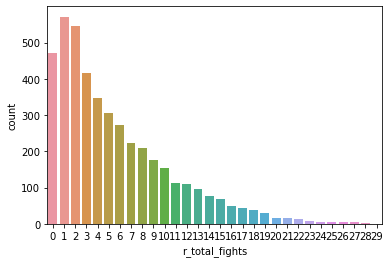

In [99]:
sns.countplot(fights.r_total_fights)

<AxesSubplot:xlabel='b_total_fights', ylabel='count'>

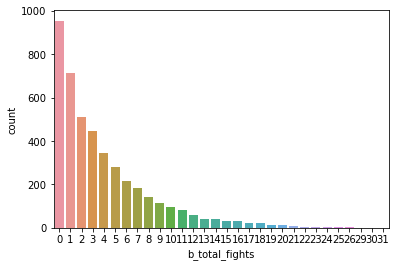

In [100]:
sns.countplot(fights.b_total_fights)

In [96]:
fights.columns

Index(['r_fighter', 'b_fighter', 'date', 'loser', 'winner', 'r_prior_wins',
       'r_prior_losses', 'r_prior_ties', 'b_prior_wins', 'b_prior_losses',
       'b_prior_ties', 'r_total_fights', 'b_total_fights', 'r_win_pct',
       'r_loss_pct', 'r_tie_pct', 'b_win_pct', 'b_loss_pct', 'b_tie_pct',
       'r_wldiff_pct', 'b_wldiff_pct', 'r_b_winner', 'guess'],
      dtype='object')

In [101]:
fights[['r_total_fights', 'b_total_fights', 'r_b_winner', 'guess']]

,r_total_fights,b_total_fights,r_b_winner,guess
0,10,5,r,r
1,5,3,b,r
2,11,1,b,r
3,13,4,b,r
4,10,0,r,r
...,...,...,...,...
4388,4,2,r,r
4389,0,1,r,r
4390,0,0,r,b
4391,1,1,r,b


In [102]:
def find_confusion_result_for_row(row):
    if row.r_b_winner == 'r' and row.guess == 'r':
        return 'TP'
    elif row.r_b_winner == 'r' and row.guess == 'b':
        return 'FP'
    elif row.r_b_winner == 'b' and row.guess == 'r':
        return 'FN'
    elif row.r_b_winner == 'b' and row.guess == 'b':
        return 'TN'
    else:
        return "I'm totally confused"

In [104]:
fights[['guess_result']] = fights.apply(find_confusion_result_for_row, axis=1)

In [105]:
fights[['r_total_fights', 'b_total_fights', 'r_b_winner', 'guess', 'guess_result']]

,r_total_fights,b_total_fights,r_b_winner,guess,guess_result
0,10,5,r,r,TP
1,5,3,b,r,FN
2,11,1,b,r,FN
3,13,4,b,r,FN
4,10,0,r,r,TP
...,...,...,...,...,...
4388,4,2,r,r,TP
4389,0,1,r,r,TP
4390,0,0,r,b,FP
4391,1,1,r,b,FP


In [107]:
fights[['accurate']] = fights.apply(lambda row: 1 if row.guess_result in ['TP', 'TN'] else 0, axis=1)
fights.head()

,r_fighter,b_fighter,date,loser,winner,r_prior_wins,r_prior_losses,r_prior_ties,b_prior_wins,b_prior_losses,...,r_tie_pct,b_win_pct,b_loss_pct,b_tie_pct,r_wldiff_pct,b_wldiff_pct,r_b_winner,guess,guess_result,accurate
0,Henry Cejudo,Marlon Moraes,2019-06-08,Marlon Moraes,Henry Cejudo,8,2,0,4,1,...,0.0,0.800000,0.200000,0.0,0.600000,0.600000,r,r,TP,1
1,Jimmie Rivera,Marlon Moraes,2018-06-01,Jimmie Rivera,Marlon Moraes,5,0,0,2,1,...,0.0,0.666667,0.333333,0.0,1.000000,0.333333,b,r,FN,0
2,John Dodson,Marlon Moraes,2017-11-11,John Dodson,Marlon Moraes,8,3,0,0,1,...,0.0,0.000000,1.000000,0.0,0.454545,-1.000000,b,r,FN,0
3,Raphael Assuncao,Marlon Moraes,2019-02-02,Raphael Assuncao,Marlon Moraes,11,2,0,3,1,...,0.0,0.750000,0.250000,0.0,0.692308,0.500000,b,r,FN,0
4,Raphael Assuncao,Marlon Moraes,2017-06-03,Marlon Moraes,Raphael Assuncao,8,2,0,0,0,...,0.0,NaN,NaN,NaN,0.600000,NaN,r,r,TP,1


In [108]:
fights[['r_total_fights', 'b_total_fights', 'r_b_winner', 'guess', 'guess_result', 'accurate']]

,r_total_fights,b_total_fights,r_b_winner,guess,guess_result,accurate
0,10,5,r,r,TP,1
1,5,3,b,r,FN,0
2,11,1,b,r,FN,0
3,13,4,b,r,FN,0
4,10,0,r,r,TP,1
...,...,...,...,...,...,...
4388,4,2,r,r,TP,1
4389,0,1,r,r,TP,1
4390,0,0,r,b,FP,0
4391,1,1,r,b,FP,0


In [111]:
fr = fights.sort_values('r_total_fights')
fr.head()[['r_total_fights', 'b_total_fights', 'r_b_winner', 'guess', 'guess_result', 'accurate']]

,r_total_fights,b_total_fights,r_b_winner,guess,guess_result,accurate
867,0,1,b,b,TN,1
3235,0,0,b,b,TN,1
4195,0,0,r,r,TP,1
3234,0,6,b,b,TN,1
3231,0,0,r,b,FP,0


In [110]:
fb = fights.sort_values('b_total_fights')
fb[['r_total_fights', 'b_total_fights', 'r_b_winner', 'guess', 'guess_result', 'accurate']].head()

,r_total_fights,b_total_fights,r_b_winner,guess,guess_result,accurate
2196,6,0,b,b,TN,1
2369,0,0,b,b,TN,1
2365,0,0,b,r,FN,0
2357,7,0,r,b,FP,0
2354,2,0,r,b,FP,0


In [156]:
#fights.groupby('r_total_fights').mean()['accurate']

r_total_fights
0     0.521277
1     0.497373
2     0.515596
3     0.541966
4     0.528902
5     0.554098
6     0.492701
7     0.522321
8     0.610577
9     0.556818
10    0.584416
11    0.482456
12    0.495413
13    0.597938
14    0.551282
15    0.514706
16    0.632653
17    0.659091
18    0.526316
19    0.500000
20    0.705882
21    0.533333
22    0.615385
23    0.857143
24    0.500000
25    0.750000
26    0.833333
27    0.833333
28    0.666667
29    1.000000
Name: accurate, dtype: float64

In [190]:
#fights.groupby('r_total_fights').sum()['accurate'] / fights.groupby('r_total_fights').count()['r_fighter']

In [163]:
(fights.groupby('r_total_fights').sum()['accurate'] / fights.groupby('r_total_fights').count()['r_fighter'] != fights.groupby('r_total_fights').mean()['accurate']).sum() == 0

True

In [165]:
(fights.groupby('b_total_fights').sum()['accurate'] / fights.groupby('b_total_fights').count()['b_fighter'] != fights.groupby('b_total_fights').mean()['accurate']).sum() == 0

True

fights.groupby('b_total_fights').mean()['accurate'] is the same as fights.groupby('b_total_fights').sum()['accurate'] / fights.groupby('b_total_fights').count()['b_fighter']
mean() does take the mean of that group.
So use mean() instead of the sum and then dividing by the count.

In [192]:
fights.groupby('r_total_fights').count()['r_fighter']

r_total_fights
0     470
1     571
2     545
3     417
4     346
5     305
6     274
7     224
8     208
9     176
10    154
11    114
12    109
13     97
14     78
15     68
16     49
17     44
18     38
19     30
20     17
21     15
22     13
23      7
24      4
25      4
26      6
27      6
28      3
29      1
Name: r_fighter, dtype: int64

In [172]:
#fights.groupby('b_total_fights').sum()['accurate'] / fights.groupby('b_total_fights').count()['b_fighter']

In [193]:
fights.groupby('b_total_fights').count()['b_fighter']

b_total_fights
0     953
1     713
2     512
3     448
4     344
5     282
6     216
7     185
8     140
9     113
10     96
11     84
12     59
13     40
14     39
15     30
16     31
17     24
18     21
19     13
20     14
21     10
22      5
23      6
24      5
25      5
26      2
29      1
30      1
31      1
Name: b_fighter, dtype: int64

In [173]:
fights.groupby('b_total_fights').mean()['accurate']

b_total_fights
0     0.505771
1     0.485273
2     0.582031
3     0.506696
4     0.569767
5     0.585106
6     0.574074
7     0.562162
8     0.528571
9     0.557522
10    0.531250
11    0.476190
12    0.542373
13    0.575000
14    0.641026
15    0.533333
16    0.580645
17    0.625000
18    0.714286
19    0.538462
20    0.642857
21    0.700000
22    0.400000
23    0.500000
24    0.200000
25    0.400000
26    0.500000
29    0.000000
30    0.000000
31    1.000000
Name: accurate, dtype: float64

In [175]:
r_accuracy = fights.groupby('r_total_fights').mean()['accurate']
b_accuracy = fights.groupby('b_total_fights').mean()['accurate']

In [179]:
sns.lineplot(r_accuracy, x='r_total_fights', y='index')

TypeError: lineplot() got multiple values for argument 'x'

<AxesSubplot:xlabel='r_total_fights', ylabel='accurate'>

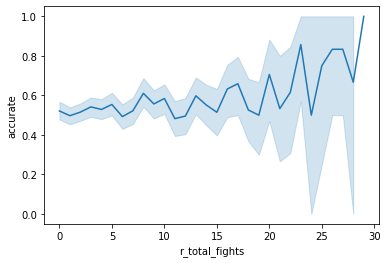

In [115]:
sns.lineplot(fights.r_total_fights, fights.accurate)

<AxesSubplot:xlabel='r_total_fights'>

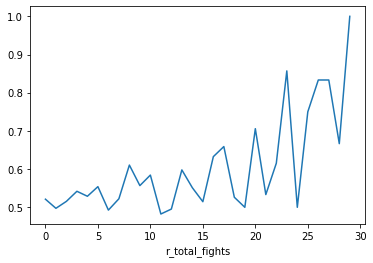

In [188]:
sns.lineplot(r_accuracy.index, r_accuracy.values)

<AxesSubplot:xlabel='b_total_fights', ylabel='accurate'>

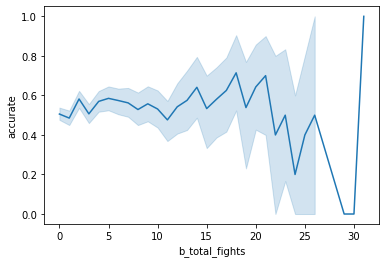

In [125]:
sns.lineplot(fights.b_total_fights, fights.accurate)

<AxesSubplot:xlabel='b_total_fights'>

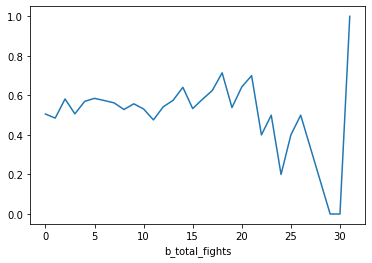

In [189]:
sns.lineplot(b_accuracy.index, b_accuracy.values)

It would seem that sns.lineplot(fights.r_total_fights, fights.accurate) and sns.lineplot(r_accuracy.index, r_accuracy.values) give me the same line, although the way the graph is done is slightly different.

<AxesSubplot:xlabel='date', ylabel='accurate'>

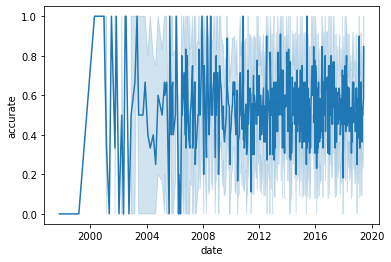

In [191]:
sns.lineplot(fights.date, fights.accurate)

The date does not seem to have much or any effect on the accuracy of this prediction.

In [118]:
f2

NameError: name 'f2' is not defined

In [120]:
f2 = fights[(fights.r_total_fights > 5) & (fights.b_total_fights > 5)]
f2.shape

(801, 25)

In [121]:
fighters_cleanser.predict(f2, 0, 0, 0)

prediction with 0, 0, 0
0.4469413233458177
[[  0  11   3]
 [  0 229  74]
 [  0 355 129]]


In [124]:
min_fights_num = 0
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 1
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 2
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 3
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 4
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 5
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 6
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 7
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 8
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 9
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 10
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 11
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 12
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 13
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 14
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 15
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 16
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 17
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 18
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 19
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 20
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 21
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)

prediction with 0, 0, 0
0.45988318475253614
[[   0   33   18]
 [   0  842  348]
 [   0 1358  654]]
prediction with 0, 0, 0
0.46775544388609713
[[   0   19   14]
 [   0  666  233]
 [   0 1005  451]]
prediction with 0, 0, 0
0.4558165548098434
[[  0  18  11]
 [  0 482 192]
 [  0 752 333]]
prediction with 0, 0, 0
0.45314787701317716
[[  0  11   8]
 [  0 378 151]
 [  0 577 241]]
prediction with 0, 0, 0
0.4453860640301318
[[  0  13   4]
 [  0 298 107]
 [  0 465 175]]
prediction with 0, 0, 0
0.4469413233458177
[[  0  11   3]
 [  0 229  74]
 [  0 355 129]]
prediction with 0, 0, 0
0.4189406099518459
[[  0   9   5]
 [  0 175  60]
 [  0 288  86]]
prediction with 0, 0, 0
0.4
[[  0   8   2]
 [  0 132  46]
 [  0 223  54]]
prediction with 0, 0, 0
0.41260744985673353
[[  0   6   1]
 [  0 109  31]
 [  0 167  35]]
prediction with 0, 0, 0
0.39919354838709675
[[  0   5   1]
 [  0  73  25]
 [  0 118  26]]
prediction with 0, 0, 0
0.43478260869565216
[[ 0  3  0]
 [ 0 54 12]
 [ 0 76 16]]
prediction with 0, 0,